<h1 align="center">MNIST Autoencoder</h1> 


![](img/autoencoder_schema.jpg)



![](img/fcautoenc.png)


In [1]:
import theano
import lasagne
import numpy as np
from theano import tensor as T
from utils import load_mnist, iterate_minibatches
%pylab inline



/Users/emil/anaconda/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import gzip
import numpy as np
from scipy import io
import cPickle as pickle

X_train, y_train, shape = load_mnist()

In [3]:
print u'Размер трейна картинки x число каналов x высота x ширина', X_train.shape 

Размер трейна картинки x число каналов x высота x ширина (60000, 1, 28, 28)


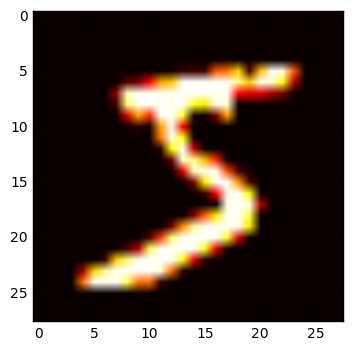

In [4]:
pylab.imshow(X_train[0, 0], cmap=pylab.cm.hot)

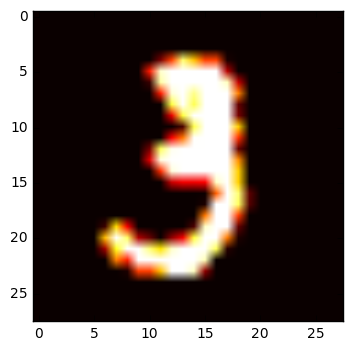

In [5]:
pylab.imshow(X_train[10, 0], cmap=pylab.cm.hot)

In [6]:
input_x, target_x = T.tensor4("Input value",  dtype='float32'), T.tensor4("Target value", dtype='float32')

In [7]:
net = lasagne.layers.InputLayer((None, 1, 28, 28), input_x, name='Input') # Входной слой
net = lasagne.layers.DenseLayer(net, 256)
net = lasagne.layers.DenseLayer(net, 128)
mid = lasagne.layers.DenseLayer(net, 32)
net = lasagne.layers.DenseLayer(mid, 128)
net = lasagne.layers.DenseLayer(net, 256)
net = lasagne.layers.DenseLayer(net, 28*28) # Последний слой
net = lasagne.layers.ReshapeLayer(net, [[0], 1, 28, 28])

In [8]:
predict_train = lasagne.layers.get_output(net)
loss_train = lasagne.objectives.squared_error(predict_train, target_x).mean()

In [9]:
weights = lasagne.layers.get_all_params(net, trainable=True)
updates = lasagne.updates.adam(loss_train, weights, learning_rate=1e-4)

In [10]:
train_func = theano.function([input_x, target_x], [loss_train], updates=updates, allow_input_downcast=True)
predi_func = theano.function([input_x], [predict_train], allow_input_downcast=True)
mid_func = theano.function([input_x], [lasagne.layers.get_output(mid)], allow_input_downcast=True)

In [11]:
for i in range(10):
    loss, num_pass = 0, 0
    for (inputs, targets) in iterate_minibatches(X_train, X_train, 100, shuffle=True):
        loss += train_func(inputs, targets)[0]
        num_pass += 1  
    print 'epoch:', i, 'loss = ', loss/num_pass, 'ok' if loss/num_pass < 0.05 else 'need to add more layers'

epoch: 0 loss =  0.0498156010674 ok
epoch: 1 loss =  0.0288414089079 ok
epoch: 2 loss =  0.0253675292907 ok
epoch: 3 loss =  0.0236657259403 ok
epoch: 4 loss =  0.0226706717274 ok
epoch: 5 loss =  0.0220315547935 ok
epoch: 6 loss =  0.0215591126752 ok
epoch: 7 loss =  0.0211485537809 ok
epoch: 8 loss =  0.0207701615306 ok
epoch: 9 loss =  0.0202175369365 ok


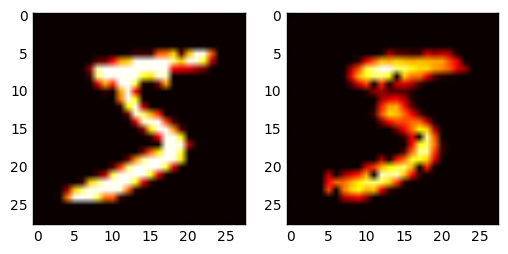

In [12]:
pylab.subplot(121)
pylab.imshow(X_train[0, 0], cmap=pylab.cm.hot)
pylab.subplot(122)
pylab.imshow(predi_func(X_train[0, 0].reshape(1, 1, 28, 28))[0][0][0], cmap=pylab.cm.hot)

In [13]:
from sklearn.manifold import TSNE

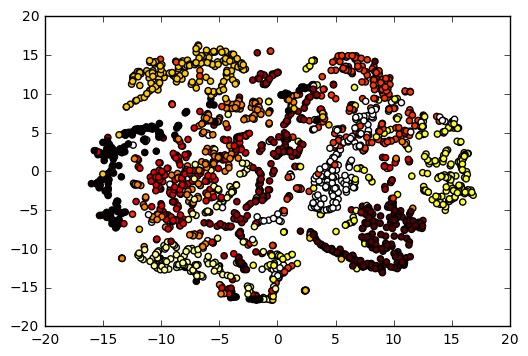

In [14]:
X_mid = mid_func(X_train)[0]
X_tsne = TSNE(n_components=2, n_iter=200).fit_transform(X_mid[:2000])
pylab.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train[:2000], cmap=pylab.cm.hot)

In [15]:
X_train_mid, y_train, X_test_mid = np.load('X_train_mid.npy'), X_train, np.load('X_test_mid.npy')


In [16]:
input_x, target_x = T.matrix("Input value",  dtype='float32'), T.tensor4("Target value", dtype='float32')
mid = lasagne.layers.InputLayer((None, 20), input_x, name='Input')
net = lasagne.layers.DenseLayer(mid, 16)
net = lasagne.layers.DenseLayer(net, 32)
net = lasagne.layers.DenseLayer(net, 64)
net = lasagne.layers.DenseLayer(net, 128)
net = lasagne.layers.DenseLayer(net, 256)
net = lasagne.layers.DenseLayer(net, 512)
net = lasagne.layers.DenseLayer(net, 600)
net = lasagne.layers.DenseLayer(net, 700)
net = lasagne.layers.DenseLayer(net, 28*28)
net = lasagne.layers.ReshapeLayer(net, [[0], 1, 28, 28])

In [17]:

predict_train = lasagne.layers.get_output(net)
loss_train = lasagne.objectives.squared_error(predict_train, target_x).mean()

weights = lasagne.layers.get_all_params(net, trainable=True)
updates = lasagne.updates.adam(loss_train, weights, learning_rate=1e-4)

train_func = theano.function([input_x, target_x], [loss_train], updates=updates, allow_input_downcast=True)
predi_func = theano.function([input_x], [predict_train], allow_input_downcast=True)
mid_func = theano.function([input_x], [lasagne.layers.get_output(mid)], allow_input_downcast=True)

In [18]:
for i in range(10):
    loss, num_pass = 0, 0
    for (inputs, targets) in iterate_minibatches(X_train_mid, X_train, 100, shuffle=True):
        loss += train_func(inputs, targets)[0]
        num_pass += 1  
    print 'epoch:', i, 'loss = ', loss/num_pass

epoch: 0 loss =  0.0577885354041
epoch: 1 loss =  0.0398654760028
epoch: 2 loss =  0.036208193271
epoch: 3 loss =  0.0342783939251
epoch: 4 loss =  0.0327673416399
epoch: 5 loss =  0.031598506309
epoch: 6 loss =  0.0303007017131
epoch: 7 loss =  0.0295215350579
epoch: 8 loss =  0.0290238388551
epoch: 9 loss =  0.0282789151943


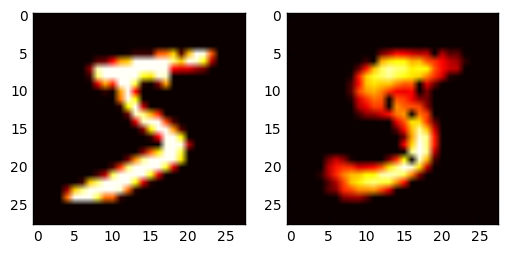

In [19]:
pylab.subplot(121)
pylab.imshow(X_train[0, 0], cmap=pylab.cm.hot)
pylab.subplot(122)
pylab.imshow(predi_func(X_train_mid[0].reshape(1, 20))[0][0][0], cmap=pylab.cm.hot)

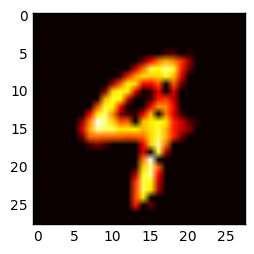

In [22]:
pylab.subplot(122)
pylab.imshow(predi_func(X_test_mid[3392].reshape(1, 20))[0][0][0], cmap=pylab.cm.hot)